#### Employee Attrition Prediction using machine learning decision tree
## Name: Ssematimba Joel
## Registration No: 2023/HD05/27861U
## Student No: 2300727861
####

In [625]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [626]:
# my dataframe
df = pd.read_csv('employee_attrition_dataset.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1. Exploratory Data Analysis (EDA)
- Load the dataset and perform initial data exploration. - Summarize key statistics and
visualizations for the dataset. - Identify missing values and decide on an appropriate strategy to
handle them. - Explore the distribution of the target variable ('Attrition').

In [627]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [628]:
missing_values = df.isnull()
missing_values


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [629]:
missing_values.sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Explore the distribution of the target variable ('Attrition')

In [630]:
atD = df['Attrition']
atD



0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

Attrition
No     1233
Yes     237
Name: count, dtype: int64


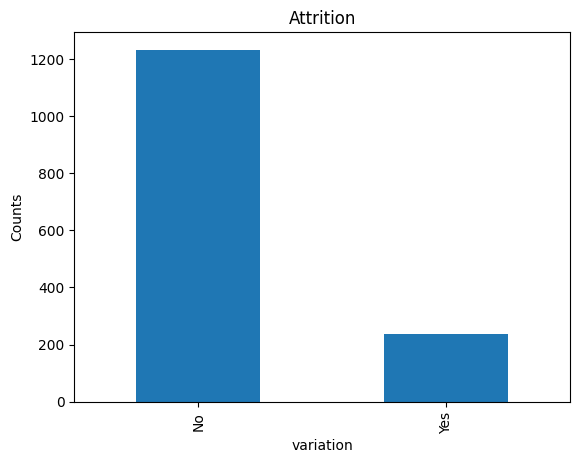

col_0          count
Attrition           
No         83.877551
Yes        16.122449


In [631]:
print(atD.value_counts())

###dummy = pd.get_dummies(df, columns=['Attrition'])
dummy = pd.get_dummies(df['Attrition'])
dummy.head()

dummy2 = pd.concat((atD, dummy), axis=1)

#print(dummy2) ## dummy2.head()

atD.value_counts().plot(kind='bar')
plt.title('Attrition')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()



tab = pd.crosstab(index=df['Attrition'], columns='count')

#find proportions 
print(((tab/tab.sum())*100))

Feature Selection and Importance Analysis - Preprocess the data, including encoding
categorical variables and scaling numerical features. - Apply feature selection techniques (e.g.,
correlation analysis, feature importance from tree-based models) to identify the most relevant
features for attrition prediction. - Justify your selection of features based on their importance.


In [632]:
df2 = df

df2['Attrition'] = df2['Attrition'].map({'Yes': 1, 'No': 0})
##print(dummy2.columns, df.dtypes)

df2
##print(df2['Attrition'])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


distribution and preprocessing of department 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


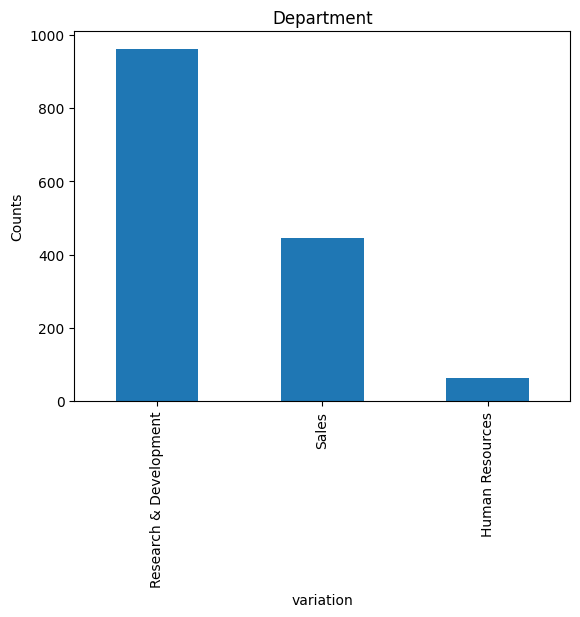

col_0,count
Department,
Human Resources,0.042857
Research & Development,0.653741
Sales,0.303401


In [633]:
depdf = df2['Department']
print(depdf.value_counts())

depdf.value_counts().plot(kind='bar')
plt.title('Department')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['Department'], columns='count')

#find proportions 
tab/tab.sum()



Map "Department" to numeric values

In [634]:
df2['Department'] = df2['Department'].map({'Research & Development': 0, 'Sales': 1, 'Human Resources':2})
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,1,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,0,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,0,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,0,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,0,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,0,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,0,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,0,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,1,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


preprocessing for education field


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


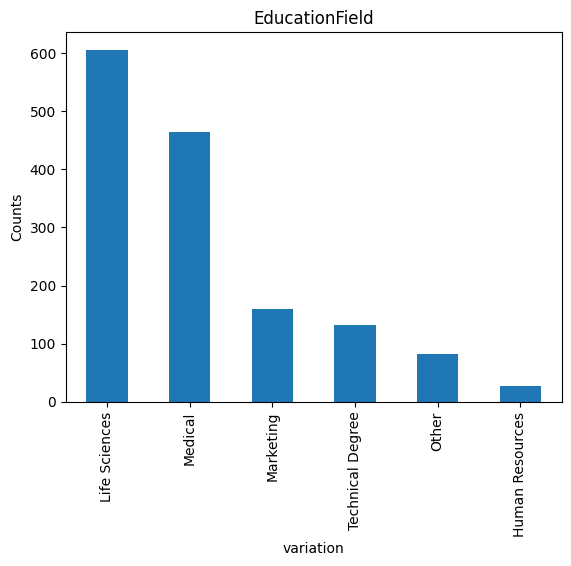

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,0,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,0,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,0,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,1,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [635]:
efdf = df2['EducationField']
print(efdf.value_counts())

efdf.value_counts().plot(kind='bar')
plt.title('EducationField')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['EducationField'], columns='count')

#find proportions 
tab/tab.sum()


df2['EducationField'] = df2['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing':2, 'Technical Degree':3, 'Other':4, 'Human Resources':5})
df2

preprocessing for business travel

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


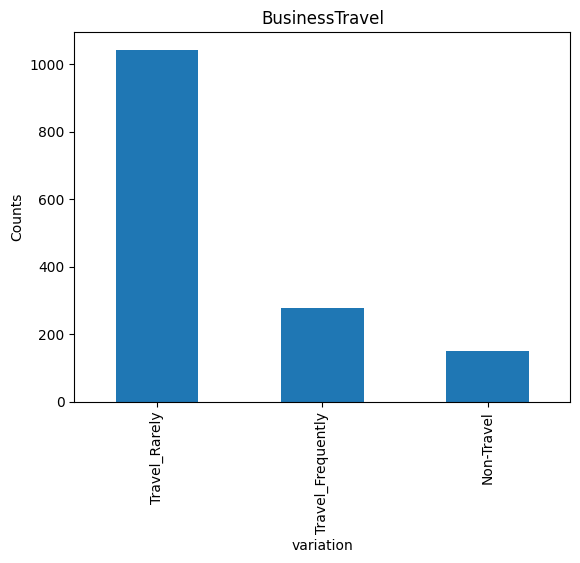

col_0                 count
BusinessTravel             
Non-Travel         0.102041
Travel_Frequently  0.188435
Travel_Rarely      0.709524


In [636]:
btdf = df2['BusinessTravel']
print(btdf.value_counts())

btdf.value_counts().plot(kind='bar')
plt.title('BusinessTravel')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['BusinessTravel'], columns='count')

#find proportions 
print(tab/tab.sum())

df2['BusinessTravel'] = df2['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel':2})


Preprocessing for Gender

Gender
Male      882
Female    588
Name: count, dtype: int64


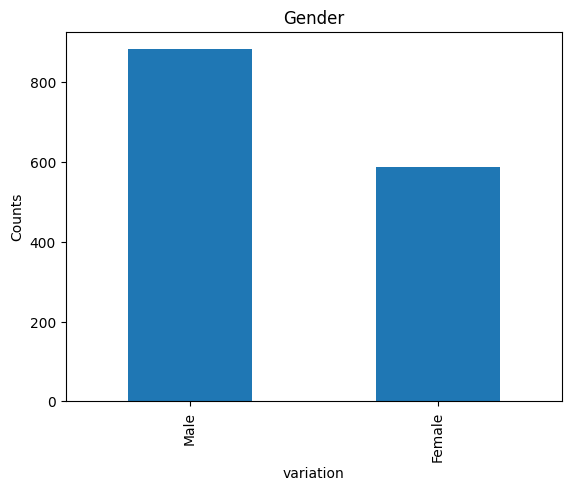

col_0   count
Gender       
Female    0.4
Male      0.6


In [637]:
gdf = df2['Gender']
print(gdf.value_counts())

gdf.value_counts().plot(kind='bar')
plt.title('Gender')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['Gender'], columns='count')

#find proportions 
print(tab/tab.sum())
df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1})





JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


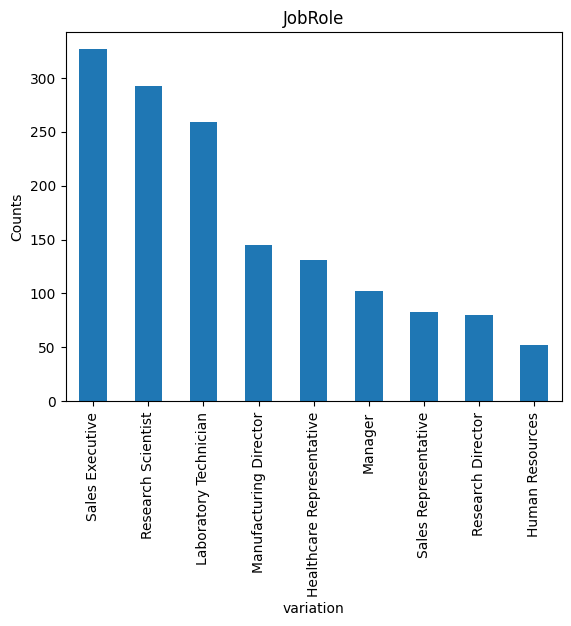

col_0                         count
JobRole                            
Healthcare Representative  0.089116
Human Resources            0.035374
Laboratory Technician      0.176190
Manager                    0.069388
Manufacturing Director     0.098639
Research Director          0.054422
Research Scientist         0.198639
Sales Executive            0.221769
Sales Representative       0.056463
0       0
1       1
2       2
3       1
4       2
       ..
1465    2
1466    4
1467    3
1468    0
1469    2
Name: JobRole, Length: 1470, dtype: int64


In [638]:
#### preprocessing for JOBROLE
jrdf = df2['JobRole']
print(jrdf.value_counts())

jrdf.value_counts().plot(kind='bar')
plt.title('JobRole')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['JobRole'], columns='count')

#find proportions 
print(tab/tab.sum())
df2['JobRole'] = df2['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative':6, 'Research Director':7, 'Human Resources':8})

print(df2['JobRole'])



Over18
Y    1470
Name: count, dtype: int64


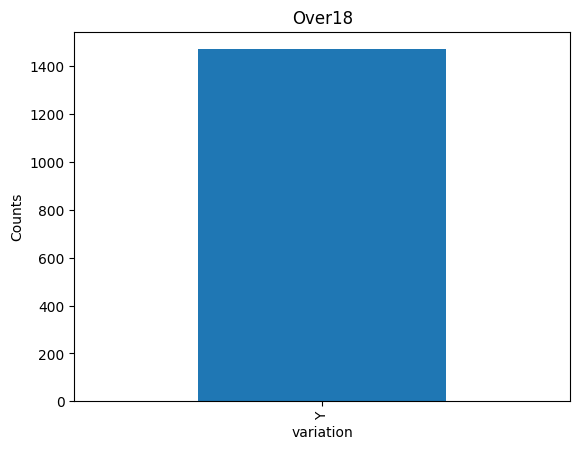

col_0   count
Over18       
Y         1.0


In [639]:
#### preprocessing for Over18
odf = df2['Over18']
print(odf.value_counts())

odf.value_counts().plot(kind='bar')
plt.title('Over18')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['Over18'], columns='count')

#find proportions 
print(tab/tab.sum())
df2['Over18'] = df2['Over18'].map({'Y':1, 'N':0})


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


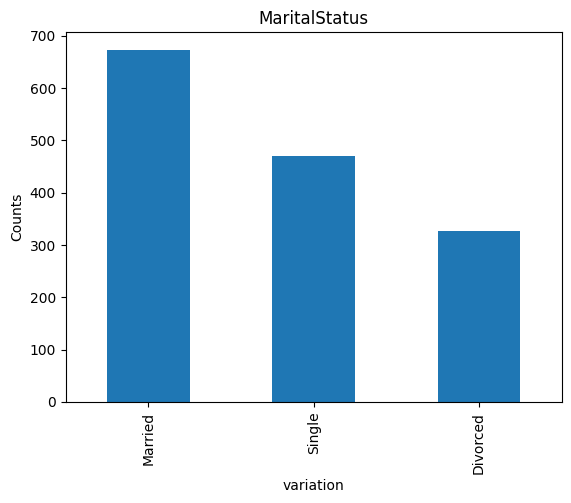

col_0             count
MaritalStatus          
Divorced       0.222449
Married        0.457823
Single         0.319728


In [640]:
#### preprocessing for MaritalStatus
msdf = df2['MaritalStatus']
print(msdf.value_counts())

msdf.value_counts().plot(kind='bar')
plt.title('MaritalStatus')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['MaritalStatus'], columns='count')

#find proportions 
print(tab/tab.sum())
df2['MaritalStatus'] = df2['MaritalStatus'].map({'Married':1, 'Single':0, 'Divorced':2})


OverTime
No     1054
Yes     416
Name: count, dtype: int64


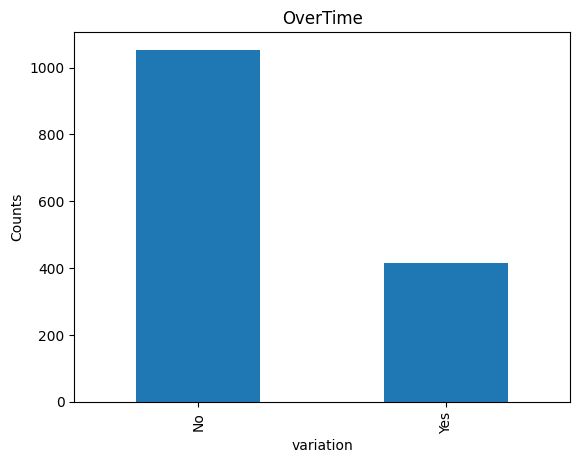

col_0        count
OverTime          
No        0.717007
Yes       0.282993


In [641]:
#### preprocessing for OverTime
otdf = df2['OverTime']
print(otdf.value_counts())

otdf.value_counts().plot(kind='bar')
plt.title('OverTime')
plt.xlabel('variation')
plt.ylabel('Counts')
plt.show()

tab = pd.crosstab(index=df['OverTime'], columns='count')

#find proportions 
print(tab/tab.sum())
df2['OverTime'] = df2['OverTime'].map({'Yes':1, 'No':0})

#print(df2[['BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition', 'Department']])

In [642]:
# Scaling using min-max scaler

scaler = StandardScaler()

df2 = pd.DataFrame(df2)


#pass arry of clumns
columns_to_scale = ['Age', 'BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
                    'Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime',
                    'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                    'YearsAtCompany']

scaled_columns = pd.DataFrame(scaler.fit_transform(df2[columns_to_scale]), columns=columns_to_scale)
df2 = pd.concat([scaled_columns, df2.drop(columns_to_scale, axis=1)], axis=1)



#scaled_data_standard = scaler.fit_transform(df2)
#df2 = scaled_data_standard
print(df2)
#print("\nStandardized DataFrame:\n", scaled_data_standard)

## Scaling using MinMaxScaler
scaler = MinMaxScaler()

#scaled_data_minmax = scaler.fit_transform(df2)
#print(scaled_data_minmax)
###print("\nMinMax Scaled DataFrame:\n", scaled_data_minmax)



           Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.446350       -0.590048   0.742527    1.074178         -1.010909   
1     1.322365        0.913194  -1.297775   -0.684220         -0.147150   
2     0.008343       -0.590048   1.414363   -0.684220         -0.887515   
3    -0.429664        0.913194   1.461466   -0.684220         -0.764121   
4    -1.086676       -0.590048  -0.524295   -0.684220         -0.887515   
...        ...             ...        ...         ...               ...   
1465 -0.101159        0.913194   0.202082   -0.684220          1.703764   
1466  0.227347       -0.590048  -0.469754   -0.684220         -0.393938   
1467 -1.086676       -0.590048  -1.605183   -0.684220         -0.640727   
1468  1.322365        0.913194   0.546677    1.074178         -0.887515   
1469 -0.320163       -0.590048  -0.432568   -0.684220         -0.147150   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
0     -0.891688       -0.865922  

feature selection.

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
Department                  0.077351
WorkLifeBalance             0.063939
EducationField              0.062320
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
JobRole                     0.027930
MonthlyRate                 0.015170
P

<Axes: >

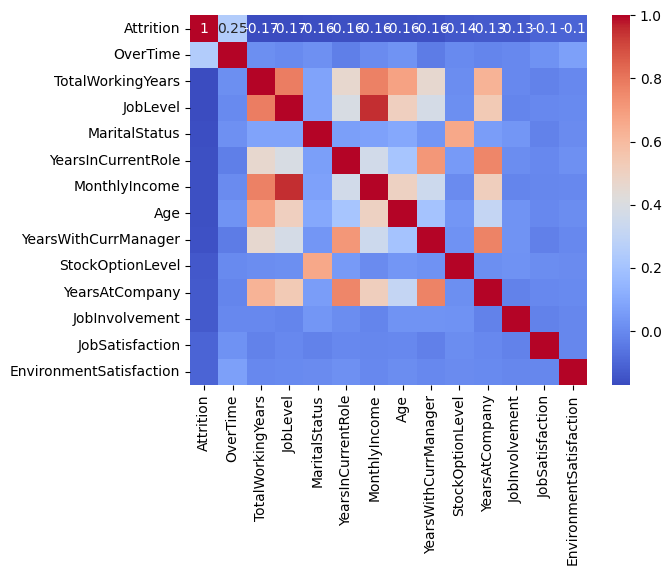

In [643]:

# Calculate the correlation between attrition and other columns 
corr_return = df2.corr()['Attrition'].abs().sort_values(ascending=False)
print(corr_return)

# Selection  with correlation threshold(0.1)
threshold_targets = corr_return[corr_return > 0.1].index.tolist()
print(threshold_targets)

# Calculate the correlation matrix between features
feature_matrix = df2[threshold_targets].corr()
print(print(threshold_targets))

# Visualize the correlation matrix (optional)
import seaborn as sns
sns.heatmap(feature_matrix, annot=True, cmap='coolwarm')

feature importance

In [644]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
###X = feature_matrix  
###y = threshold_targets    
X = df2.drop('Attrition', axis=1)  
y = df2['Attrition']
model.fit(X, y)



RandomForestClassifier(random_state=42)

In [645]:
# Get feature importances
feature_importances = model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]



# Print or visualize feature importances
for feature_name, sorted_importances in zip(X.columns, sorted_importances):
    
    print(f"Feature: {feature_name}, Importance: {sorted_importances}")



Feature: Age, Importance: 0.07062709956942963
Feature: BusinessTravel, Importance: 0.06309346607111063
Feature: DailyRate, Importance: 0.054237147846086214
Feature: Department, Importance: 0.0517377786504577
Feature: DistanceFromHome, Importance: 0.05093010246343719
Feature: Education, Importance: 0.048326420586440696
Feature: EducationField, Importance: 0.04759107295035881
Feature: EmployeeCount, Importance: 0.047249532198743664
Feature: EmployeeNumber, Importance: 0.04721815163965662
Feature: EnvironmentSatisfaction, Importance: 0.03965905006672948
Feature: Gender, Importance: 0.03552512465707309
Feature: HourlyRate, Importance: 0.0318800772118235
Feature: JobInvolvement, Importance: 0.03148387761731228
Feature: JobLevel, Importance: 0.028335021736135117
Feature: JobRole, Importance: 0.02768372833425293
Feature: JobSatisfaction, Importance: 0.027503603788363175
Feature: MaritalStatus, Importance: 0.02602231017425529
Feature: MonthlyIncome, Importance: 0.025296571396472636
Feature: Mo

In [646]:
selected_features = sorted_features[:12]  # Select the top k features
print(selected_features)

Index(['MonthlyIncome', 'Age', 'OverTime', 'TotalWorkingYears', 'DailyRate',
       'EmployeeNumber', 'DistanceFromHome', 'MonthlyRate', 'HourlyRate',
       'YearsAtCompany', 'NumCompaniesWorked', 'PercentSalaryHike'],
      dtype='object')


Model Building - Split the dataset into training and testing sets (e.g., 80% training, 20%
testing). - Choose an appropriate machine learning algorithm for classification (e.g., Decision
Trees, Random Forest, Logistic Regression, etc.). - Train a classification model on the training
dataset using the selected features. - Fine-tune the hyperparameters of the model (e.g., using
cross-validation) to optimize its performance.

In [647]:
from sklearn.model_selection import train_test_split

X = df2.drop('Attrition', axis=1)  
y = df2['Attrition']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1176, 34)
Shape of X_test: (294, 34)
Shape of y_train: (1176,)
Shape of y_test: (294,)


# Reasons why Classification with random forest.
Ensemble method that combines multiple decision trees.

Reduces overfitting compared to single decision trees#.

Handles both classification and regression tasks.

Good for feature importance analysis.

In [650]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###data = df2 ##scaled_data_standard

####X = data.drop('Attrition', axis=1)  
####y = data['Attrition']
####X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clfModel = RandomForestClassifier(n_estimators=100, random_state=42)
##clfModel = RandomForestClassifier(n_estimators=100, random_state=42)
clfModel.fit(X_train, y_train)


y_pred = clfModel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred) 

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix: \n", cm)

Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix: 
 [[254   1]
 [ 35   4]]
